In [8]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.visibility_prm import VisibilityPRM
from planners.hierarchical_planner import HierarchicalPlanner
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from utils.visibility_prm_visualize import visibility_prm_visualize
from utils.hierarchical_visualize import visualize_hierarchical_planning
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes
import time
import pandas as pd
from scipy.spatial.distance import euclidean

In [15]:
# ---- Konfiguration für den globalen Planer (VisibilityPRM) ----
config_high = {
    "ntry": 100
}

config_low_lazy = {
    "initialRoadmapSize": 20,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 50,
    "radius": 4
}

In [17]:
import os
import matplotlib.pyplot as plt

# 📁 Ordner für Plots & Ergebnisse
plot_dir = "plots_hierarchical"
results_dir = "benchmark_results"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# ---- Benchmark-Runner ----
def run_benchmark(subplanner_type, config_local):
    results = []
    SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        planner = HierarchicalPlanner(
            scene=scene,
            limits=limits,
            GlobalPlannerClass=VisibilityPRM,
            LocalPlannerClass=SubPlanner,
            config_global=config_high,
            config_local=config_local
        )

        t0 = time.time()
        path = planner.plan_path(start, goal)
        t1 = time.time()

        coords = planner.get_solution_path() if path else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not path:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")
        planner.solution_path = path
        planner.graph = planner.global_planner.graph

        # 📸 Visualisierung speichern
        visualize_hierarchical_planning(planner, collision_checker, config_local)
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, filename), dpi=300)
        plt.close()

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(path),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(planner.graph.nodes),
            "edges": len(planner.graph.edges),
            "roadmap_size": planner.graph.size()
        }
        results.append(result)

    return results



🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape
Globaler Pfad: ['start', 0, 28, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([0.52418724, 2.99842706]), array([17.23921535,  4.74069694]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [0.52418724 2.99842706]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [0.52418724 2.99842706]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.262093622462444)), (np.float64(3.499213532323422), np.float64(19.499213532323424)))
Segment 1: [0.52418724 2.99842706] → [17.23921535  4.74069694]
→ Lokaler Planner für Segment 1: [0.52418724 2.99842706] → [17.23921535  4.74069694]
   Lokale Begrenzung (geclipped): ((np.float64(0.8817012955646444), np.float64(16.881701295564646)), (0, np.float64(11.86956200111077)))
Segment 2: [17.23921535  4.74069694] → [20.0, 2.0]
→ Lokaler Planner für Segment 2: [17.23921535  4.74069694] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(14.72944680133036), 22), (0, np.float64(7.260509340559187)))


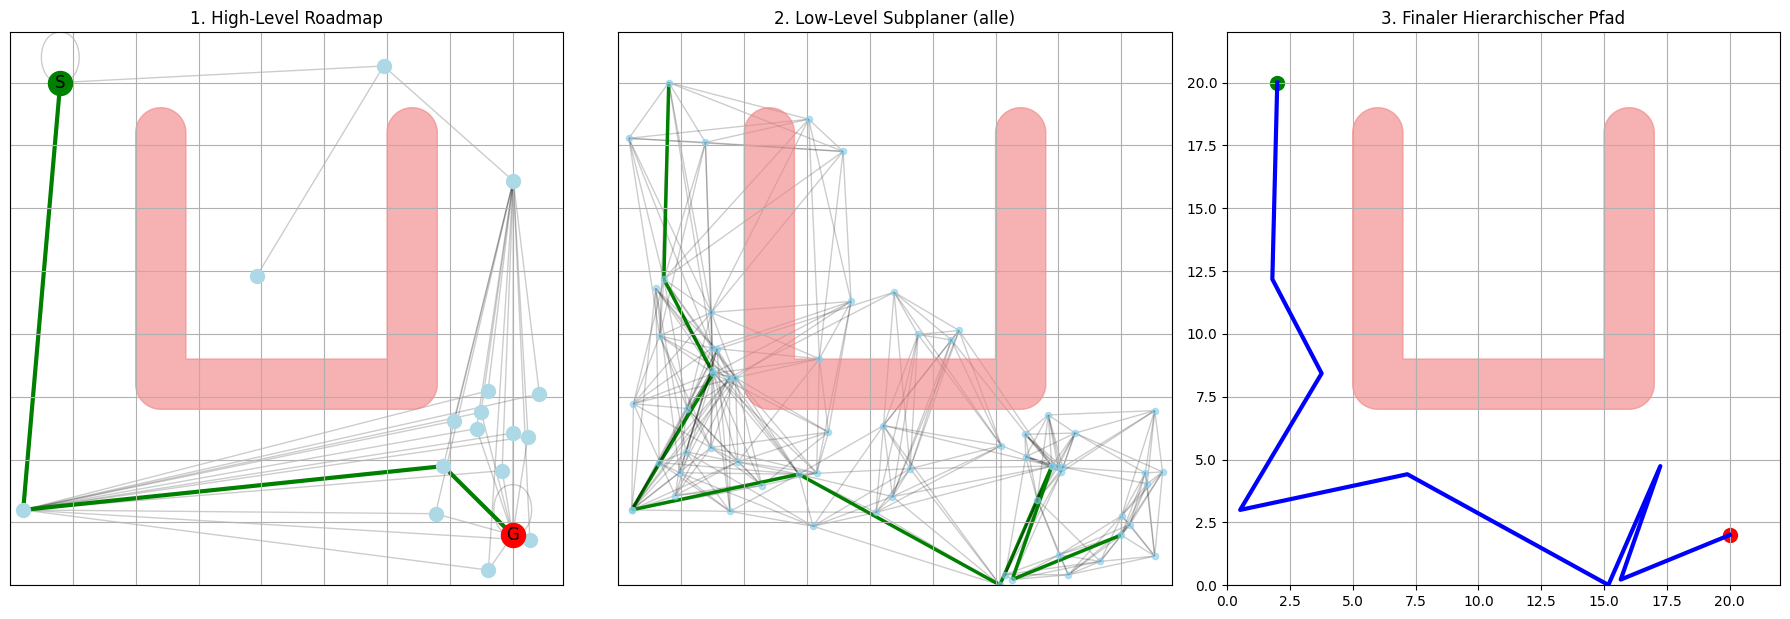


🔍 Szene: L-Shape
Globaler Pfad: ['start', 14, 1, 93, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([4.28047672, 5.13492364]), array([11.4411755 ,  1.75954572]), array([20.626947  , 10.63140251]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [4.28047672 5.13492364]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [4.28047672 5.13492364]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.016876114584759)), (0, np.float64(7.444099573131992)))
Segment 1: [4.28047672 5.13492364] → [11.4411755   1.75954572]
→ Lokaler Planner für Segment 1: [4.28047672 5.13492364] → [11.4411755   1.75954572]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.77718783949675)), (0, np.float64(11.363596410221746)))
Segment 2: [11.4411755   1.75954572] → [20.626947   10.63140251]
→ Lokaler Planner für Segment 2: [11.4411755   1.75954572] → [20.626947   10.63140251]
   Lokale Begrenzung (geclipped): ((np.float64(8.034061247225562), 22), (0, np.float64(14.195474116151782)))
Segment 3: [20.626947   10.6314025

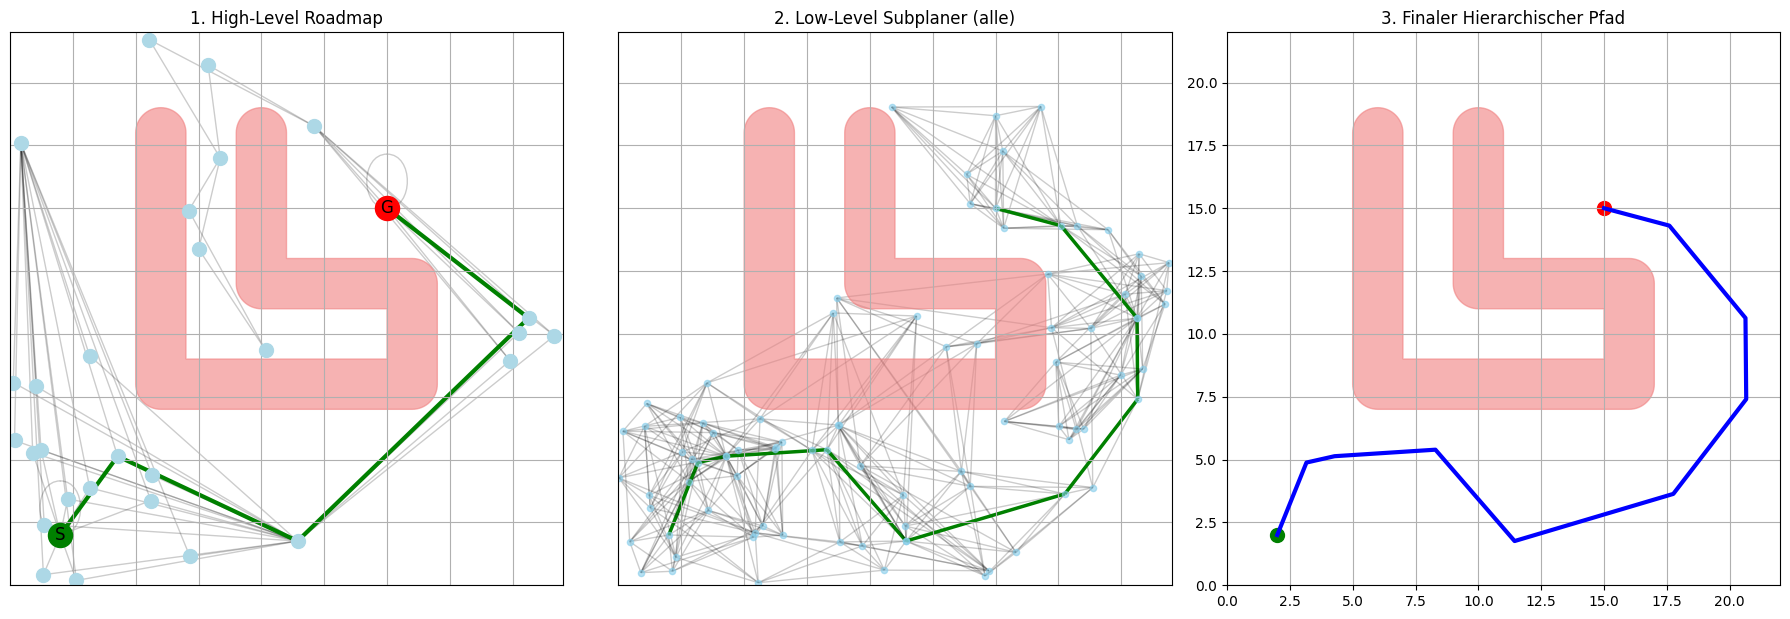


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 115, 10, 26, 0, 35, 20, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([3.74966061, 4.41484189]), array([ 5.26710989, 12.92393414]), array([ 4.2879195 , 20.58705101]), array([12.29635463, 20.3232253 ]), array([18.75401411, 19.6378084 ]), array([17.61195606,  3.58638317]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [3.74966061 4.41484189]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [3.74966061 4.41484189]
   Lokale Begrenzung (geclipped): ((np.float64(2.9943381455997056), np.float64(5.755322464941155)), (np.float64(3.3269287851667055), np.float64(6.087913104508155)))
Segment 1: [3.74966061 4.41484189] → [ 5.26710989 12.92393414]
→ Lokaler Planner für Segment 1: [3.74966061 4.41484189] → [ 5.26710989 12.92393414]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.50838525062459)), (np.float64(0.6693880146141318), np.float64(16.669

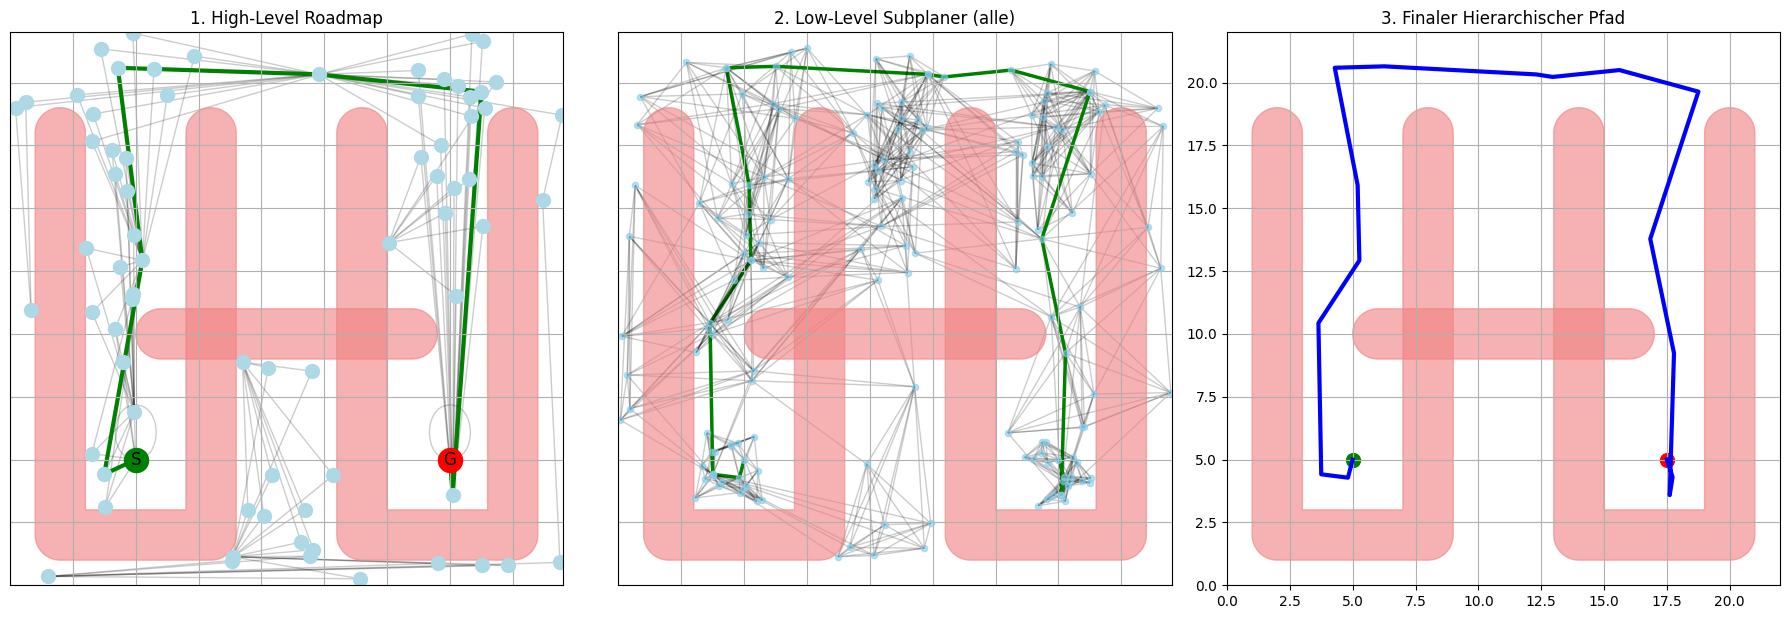


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 106, 26, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([5.79212437, 1.37313872]), array([ 5.52454469, 15.01217902]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [5.79212437 1.37313872]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [5.79212437 1.37313872]
   Lokale Begrenzung (geclipped): ((0, np.float64(8.202691827636029)), (0, np.float64(5.993198999304146)))
Segment 1: [5.79212437 1.37313872] → [ 5.52454469 15.01217902]
→ Lokaler Planner für Segment 1: [5.79212437 1.37313872] → [ 5.52454469 15.01217902]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.658334529451515)), (np.float64(0.1926588682717405), np.float64(16.192658868271742)))
❌ Keine lokale Verbindung zwischen [5.79212437 1.37313872] und [ 5.52454469 15.01217902].
❌ Kein Pfad gefunden in Szene: Multiple Obstacles

🔍 Szene: Crossed Obstacles
Globaler Pfad: ['start', 40, 1, 23, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([0.7452559 , 3.65689158]), ar

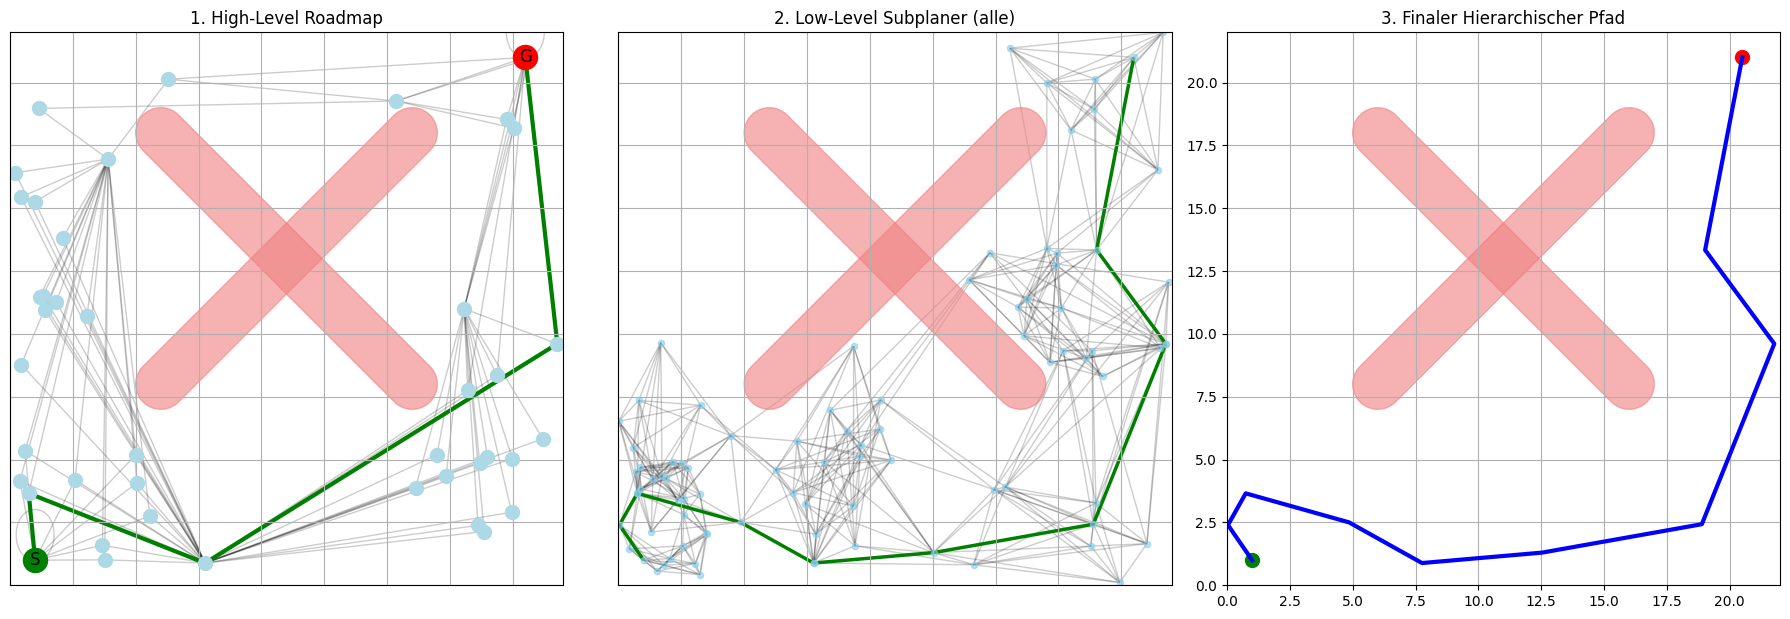


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 79, 3, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([3.168319  , 0.75035039]), array([21.57527298, 18.62277608]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [3.168319   0.75035039]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [3.168319   0.75035039]
   Lokale Begrenzung (geclipped): ((0, np.float64(4.266802904028671)), (0, np.float64(3.0578185998415734)))
Segment 1: [3.168319   0.75035039] → [21.57527298 18.62277608]
→ Lokaler Planner für Segment 1: [3.168319   0.75035039] → [21.57527298 18.62277608]
   Lokale Begrenzung (geclipped): ((np.float64(4.371795991961207), np.float64(20.371795991961207)), (np.float64(1.6865632382959959), np.float64(17.686563238295996)))
Segment 2: [21.57527298 18.62277608] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [21.57527298 18.62277608] → [19.0, 19.0]
   Lokale Begrenzung (geclipped): ((np.float64(17.684882408514145), 22), (np.float64(16.20863395903603), np.float64(21.414142123201334)))
✅ 

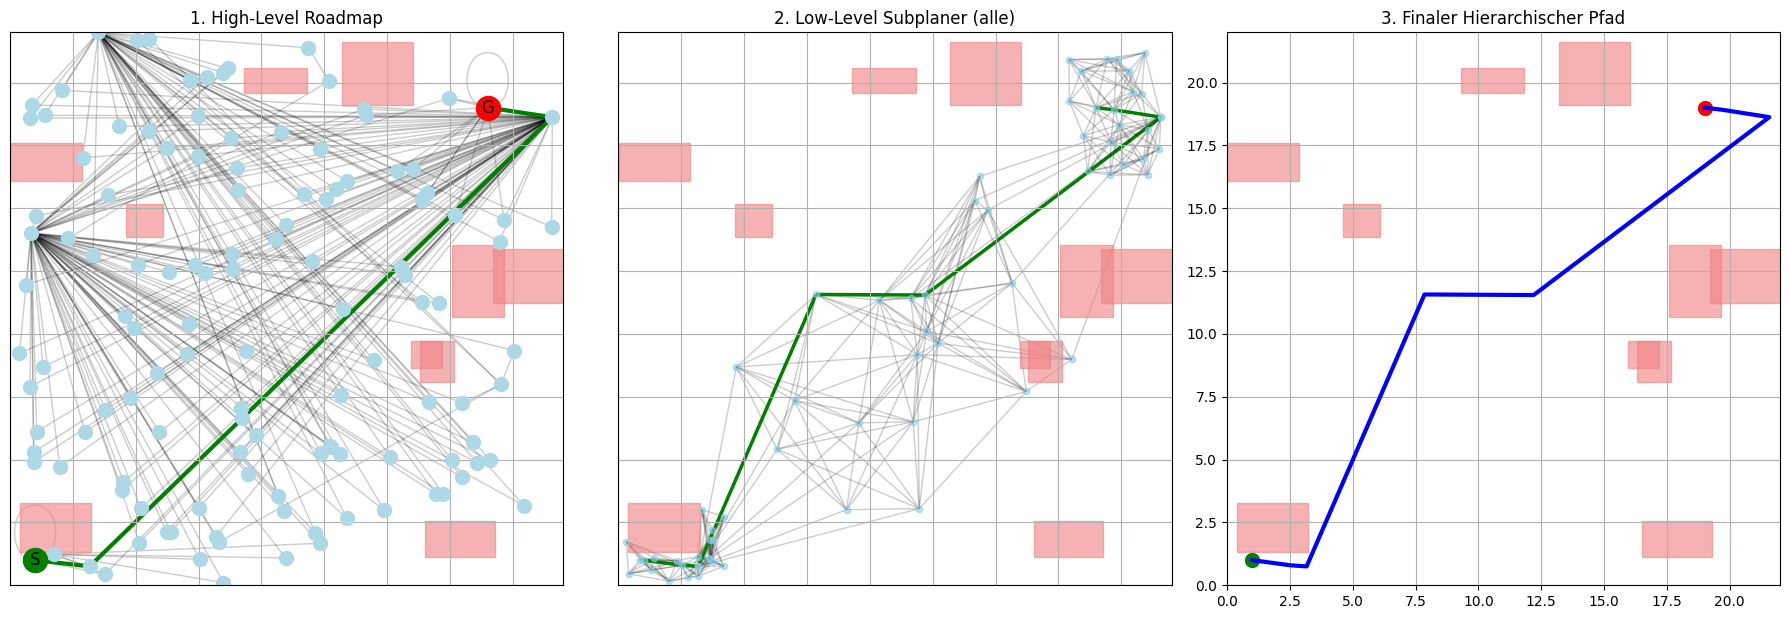


🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape
Globaler Pfad: ['start', 36, 0, 9, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([0.56529739, 4.17637779]), array([15.07722852,  6.61791345]), array([20.88825005,  1.74937443]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [0.56529739 4.17637779]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [0.56529739 4.17637779]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.28264869590992)), (np.float64(4.088188893716309), np.float64(20.088188893716307)))
Segment 1: [0.56529739 4.17637779] → [15.07722852  6.61791345]
→ Lokaler Planner für Segment 1: [0.56529739 4.17637779] → [15.07722852  6.61791345]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.8212629543526)), (0, np.float64(13.397145616537161)))
Segment 2: [15.07722852  6.61791345] → [20.88825005  1.74937443]
→ Lokaler Planner für Segment 2: [15.07722852  6.61791345] → [20.88825005  1.74937443]
   Lokale Begrenzung (geclipped): ((np.float64(10.401799801588801), 22),

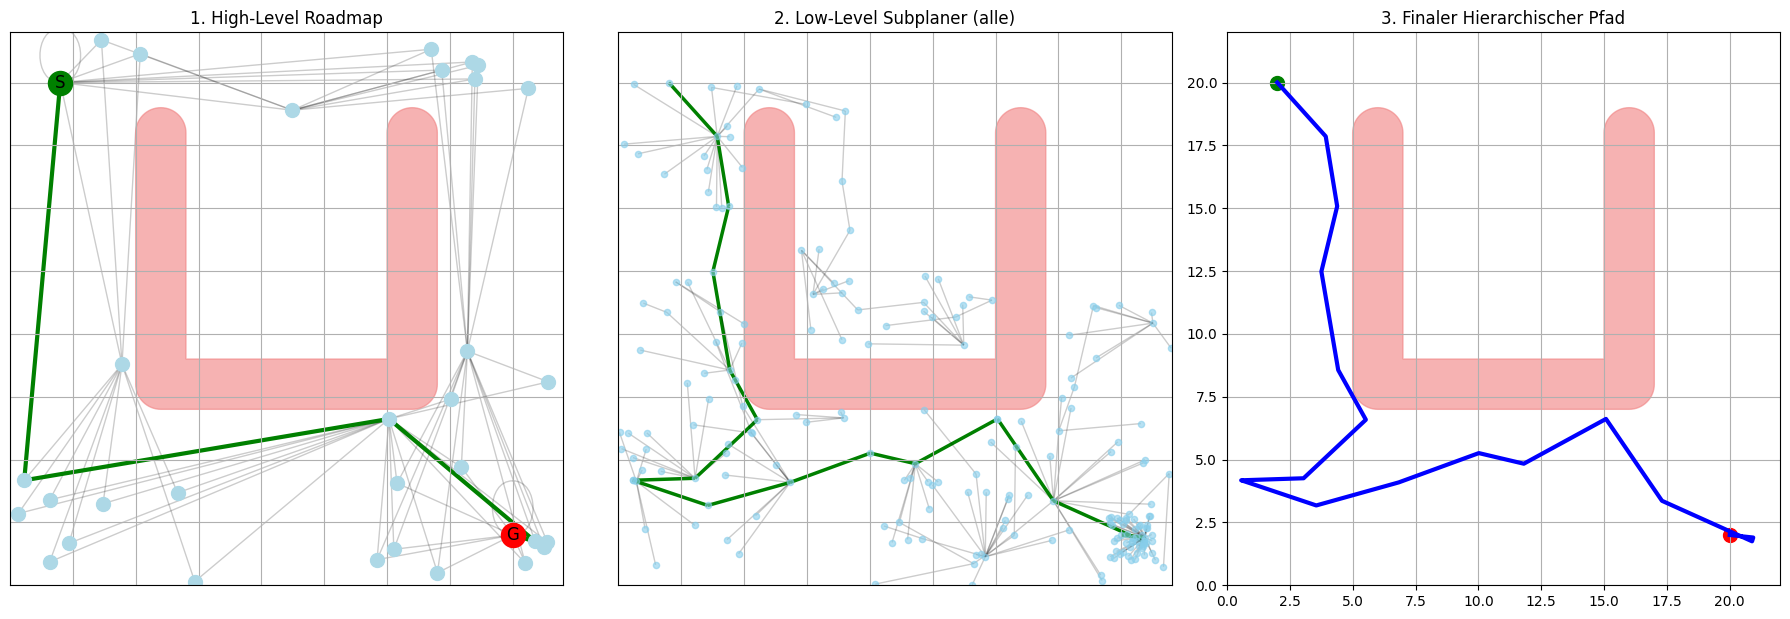


🔍 Szene: L-Shape
Globaler Pfad: ['start', 24, 3, 90, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([2.25981761, 1.93825526]), array([15.51709489,  3.34093946]), array([19.68144566, 14.27444203]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [2.25981761 1.93825526]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [2.25981761 1.93825526]
   Lokale Begrenzung (geclipped): ((np.float64(1.6299088059368705), np.float64(2.6299088059368705)), (np.float64(1.4691276322739446), np.float64(2.4691276322739446)))
Segment 1: [2.25981761 1.93825526] → [15.51709489  3.34093946]
→ Lokaler Planner für Segment 1: [2.25981761 1.93825526] → [15.51709489  3.34093946]
   Lokale Begrenzung (geclipped): ((np.float64(0.8884562491410026), np.float64(16.888456249141)), (0, np.float64(10.639597364000567)))
Segment 2: [15.51709489  3.34093946] → [19.68144566 14.27444203]
→ Lokaler Planner für Segment 2: [15.51709489  3.34093946] → [19.68144566 14.27444203]
   Lokale Begrenzung (geclipped): ((np.float64(9.5992702

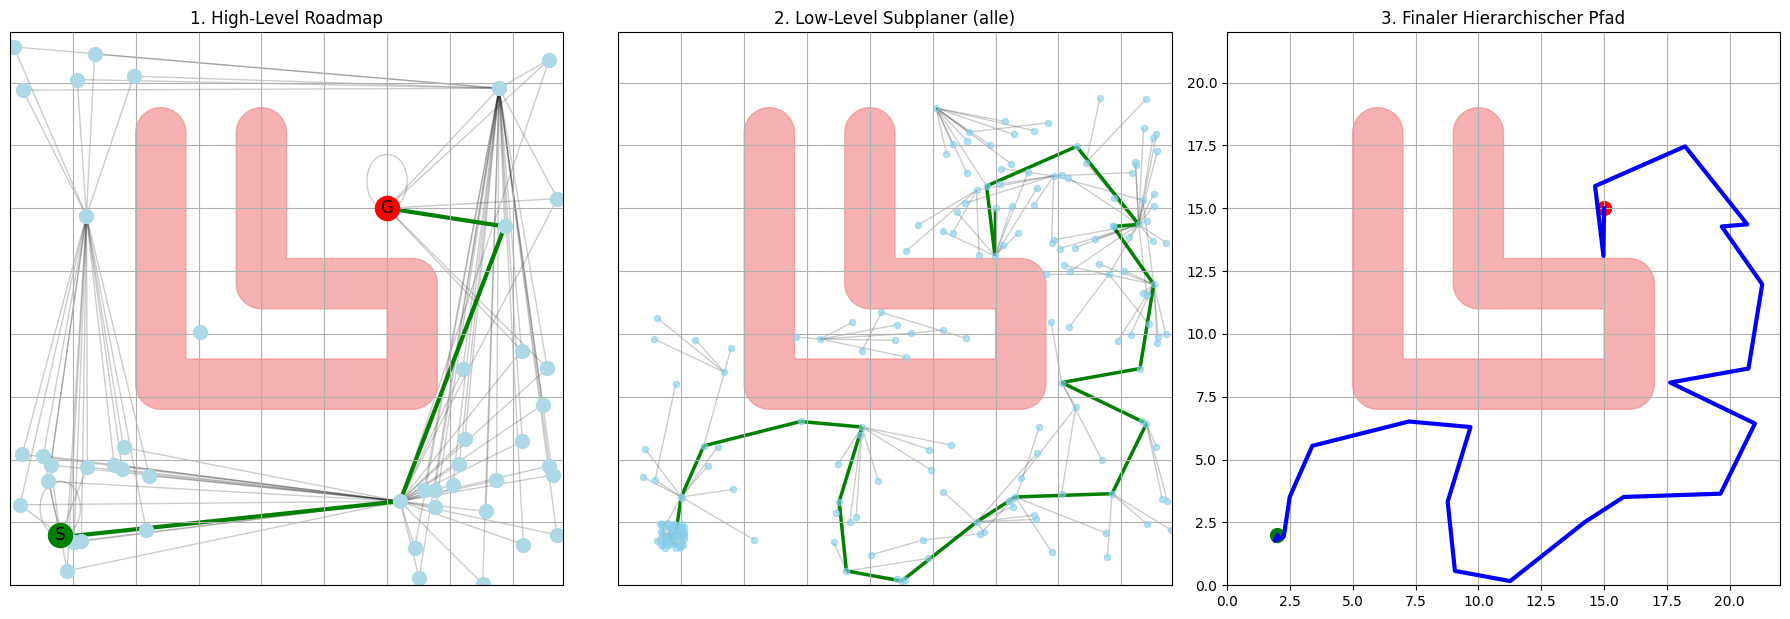


🔍 Szene: Corridor
Globaler Pfad: ['start', 176, 102, 104, 7, 115, 'goal']
Koordinaten des globalen Pfads: [[10.0, 5.0], array([8.64852084, 3.14775818]), array([3.25837872, 1.22682185]), array([0.46799007, 3.79522042]), array([ 1.67692679, 14.68071154]), array([ 2.97092061, 19.93934647]), [10.0, 15.0]]
Segment 0: [10.0, 5.0] → [8.64852084 3.14775818]
→ Lokaler Planner für Segment 0: [10.0, 5.0] → [8.64852084 3.14775818]
   Lokale Begrenzung (geclipped): ((np.float64(7.0313810789165725), np.float64(11.617139760361978)), (np.float64(1.7809997506956186), np.float64(6.366758432141022)))
Segment 1: [8.64852084 3.14775818] → [3.25837872 1.22682185]
→ Lokaler Planner für Segment 1: [8.64852084 3.14775818] → [3.25837872 1.22682185]
   Lokale Begrenzung (geclipped): ((np.float64(0.23124491878092357), np.float64(11.675654638866908)), (0, np.float64(7.909494878818565)))
Segment 2: [3.25837872 1.22682185] → [0.46799007 3.79522042]
→ Lokaler Planner für Segment 2: [3.25837872 1.22682185] → [0.46799

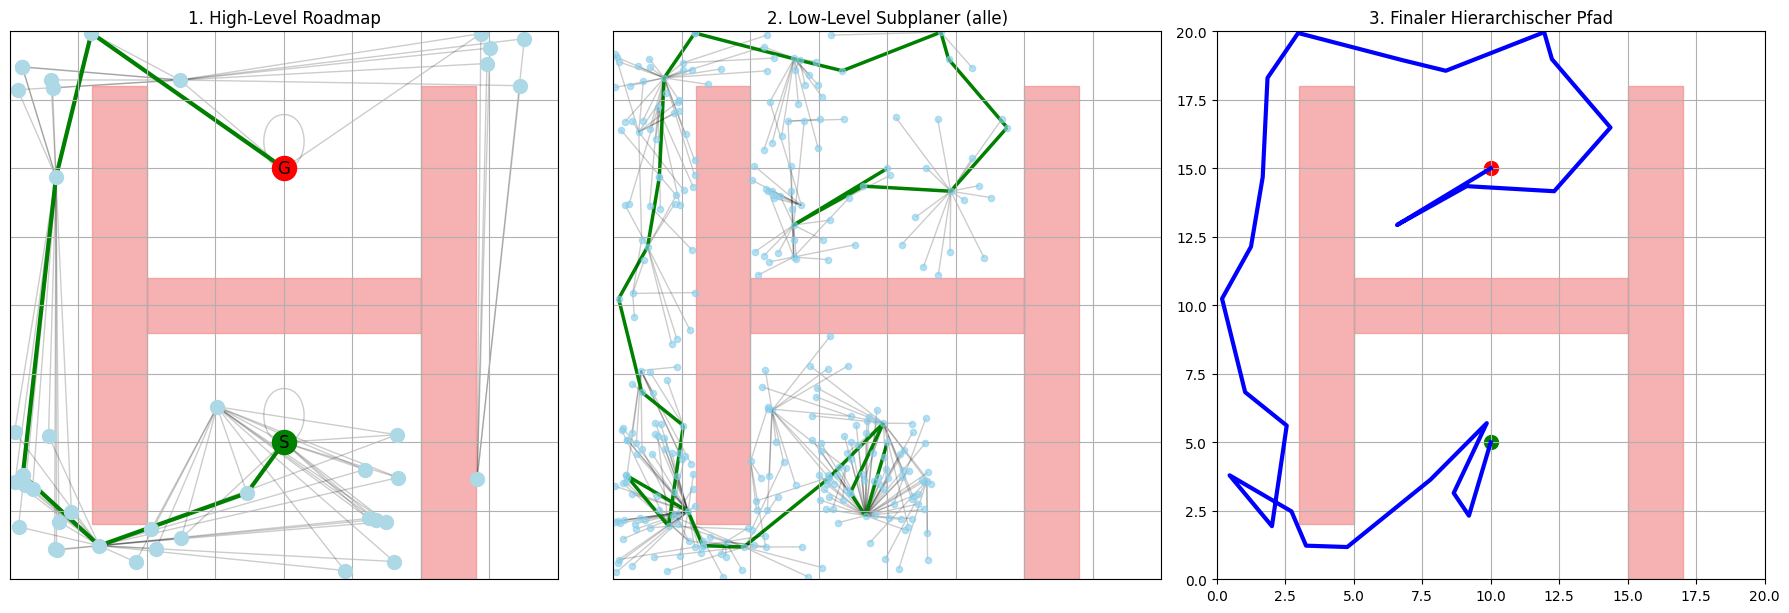


🔍 Szene: Complex Shape
Globaler Pfad: ['start', 93, 11, 18, 0, 38, 16, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.64806815, 4.95874827]), array([ 4.66002473, 18.12679276]), array([ 2.03387581, 21.23097922]), array([11.8375943 , 18.92010124]), array([16.45273208, 20.63550081]), array([17.25158232,  6.50913369]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.64806815 4.95874827]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.64806815 4.95874827]
   Lokale Begrenzung (geclipped): ((np.float64(4.324034074822653), np.float64(5.324034074822653)), (np.float64(4.479374134064181), np.float64(5.479374134064181)))
Segment 1: [4.64806815 4.95874827] → [ 4.66002473 18.12679276]
→ Lokaler Planner für Segment 1: [4.64806815 4.95874827] → [ 4.66002473 18.12679276]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.654046442257144)), (np.float64(3.542770514516466), np.float64(19.542770514516466)))
Segment 2: [ 4.66002473 18.12679276] → [ 2.03387581 21.23097922]
→ Lokaler Planner für S

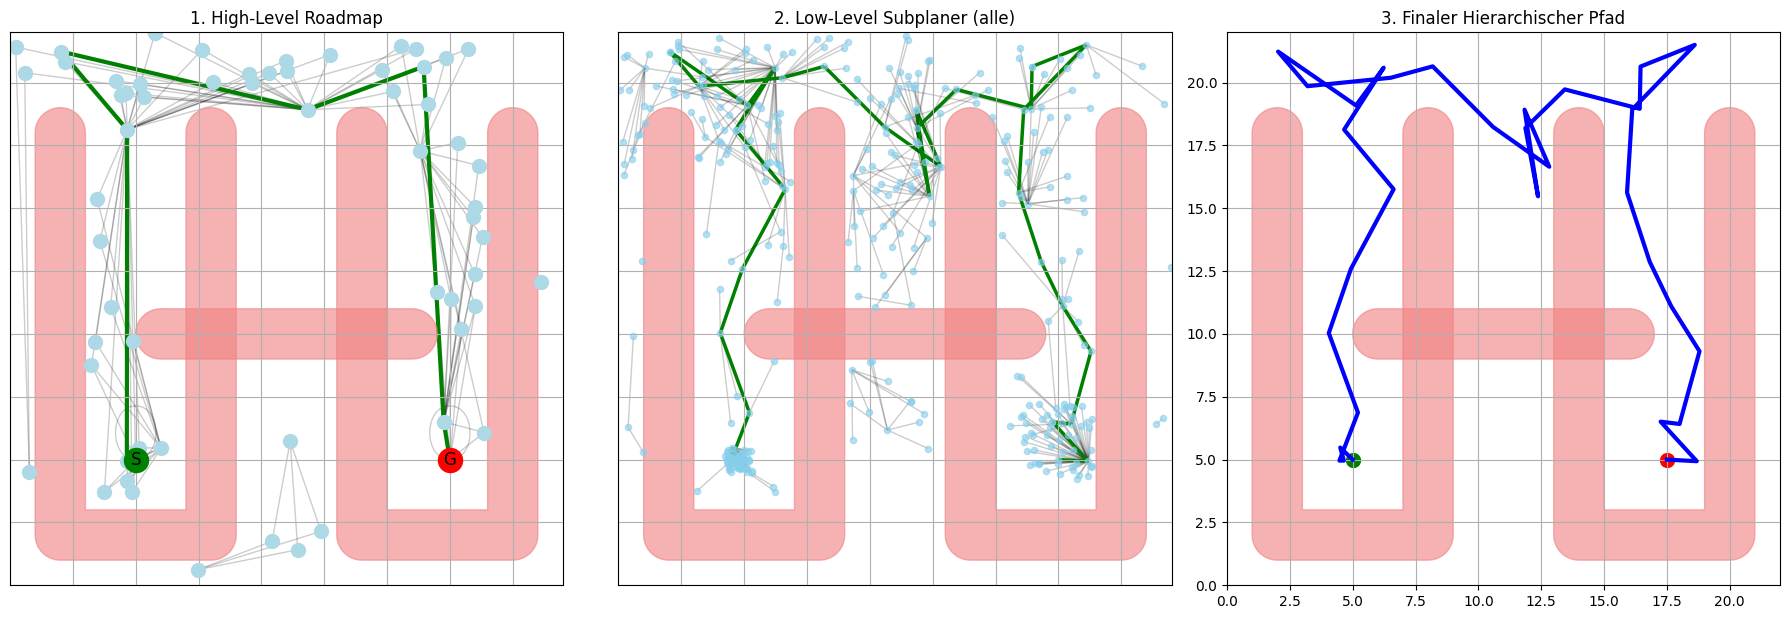


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 69, 169, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.42540755, 3.60599354]), array([ 1.80542047, 21.45099548]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [1.42540755 3.60599354]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.42540755 3.60599354]
   Lokale Begrenzung (geclipped): ((0, np.float64(3.853191210668851)), (0, np.float64(4.943484202450105)))
Segment 1: [1.42540755 3.60599354] → [ 1.80542047 21.45099548]
→ Lokaler Planner für Segment 1: [1.42540755 3.60599354] → [ 1.80542047 21.45099548]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.615414009223805)), (np.float64(4.5284945095903595), np.float64(20.52849450959036)))
❌ Keine lokale Verbindung zwischen [1.42540755 3.60599354] und [ 1.80542047 21.45099548].
❌ Kein Pfad gefunden in Szene: Multiple Obstacles

🔍 Szene: Crossed Obstacles
Globaler Pfad: ['start', 84, 0, 39, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([0.34700001, 1.97497877]), arra

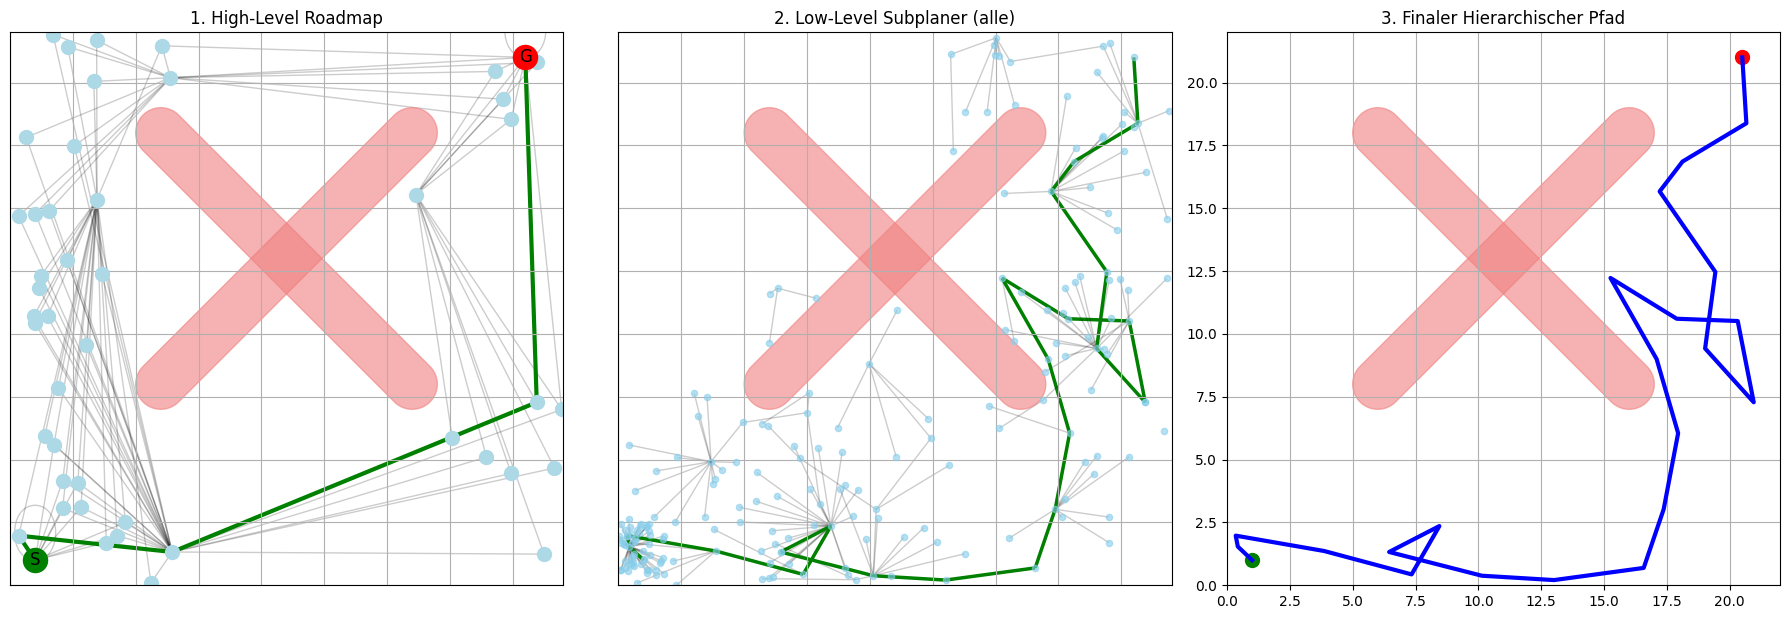


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 114, 0, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([2.80675339, 0.8433199 ]), array([18.28935914, 17.18285789]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [2.80675339 0.8433199 ]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [2.80675339 0.8433199 ]
   Lokale Begrenzung (geclipped): ((np.float64(0.08984244662246077), np.float64(3.716910946024484)), (0, np.float64(2.7351942008795977)))
Segment 1: [2.80675339 0.8433199 ] → [18.28935914 17.18285789]
→ Lokaler Planner für Segment 1: [2.80675339 0.8433199 ] → [18.28935914 17.18285789]
   Lokale Begrenzung (geclipped): ((np.float64(2.548056268247514), np.float64(18.548056268247514)), (np.float64(1.0130888938407452), np.float64(17.013088893840745)))
Segment 2: [18.28935914 17.18285789] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [18.28935914 17.18285789] → [19.0, 19.0]
   Lokale Begrenzung (geclipped): ((np.float64(16.693521994648357), np.float64(20.59583714919973)), (np.float

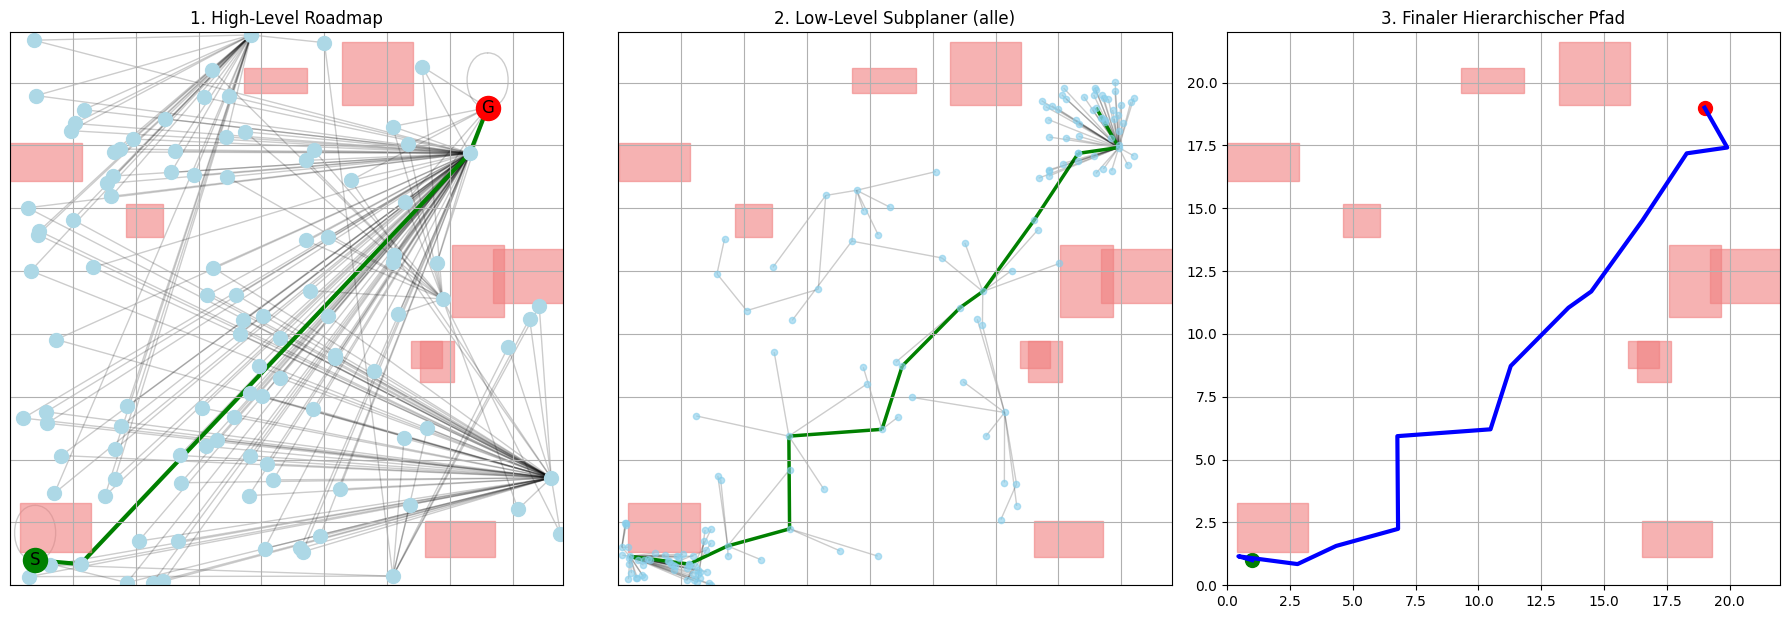


✅ Alle Benchmarks abgeschlossen.


In [18]:
# ---- Beide Varianten durchlaufen ----
all_results = []

# Lazy-Run
lazy_results = run_benchmark("Lazy", config_low_lazy)
lazy_df = pd.DataFrame(lazy_results)
lazy_df.to_csv(os.path.join(results_dir, "Hierarchical-Lazy_results.csv"), index=False)
all_results.extend(lazy_results)

# Basic-Run
basic_results = run_benchmark("Basic", config_low_basic)
basic_df = pd.DataFrame(basic_results)
basic_df.to_csv(os.path.join(results_dir, "Hierarchical-Basic_results.csv"), index=False)
all_results.extend(basic_results)

# Optional: Zusammengefasst
all_df = pd.DataFrame(all_results)
all_df.to_csv(os.path.join(results_dir, "Hierarchical_ALL_results.csv"), index=False)

print("\n✅ Alle Benchmarks abgeschlossen.")

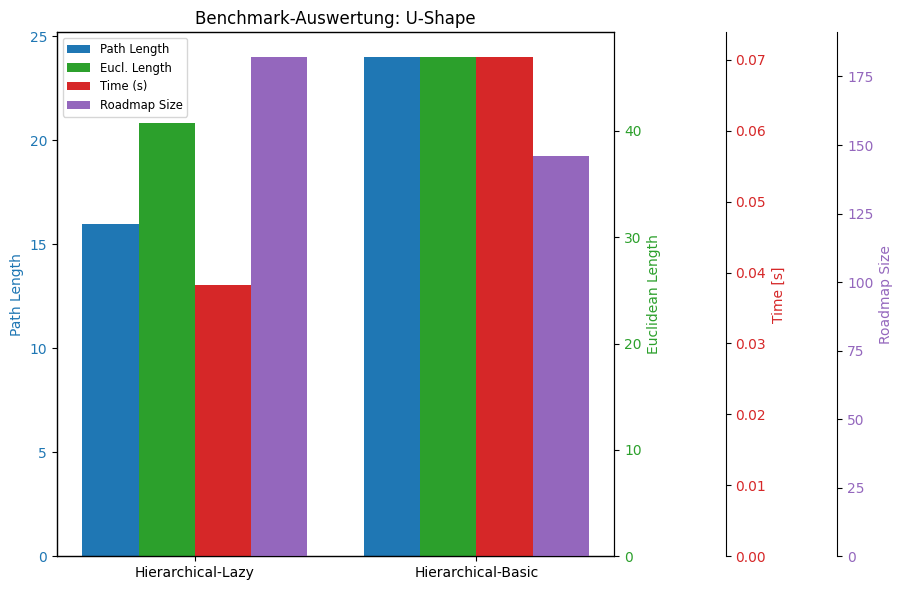

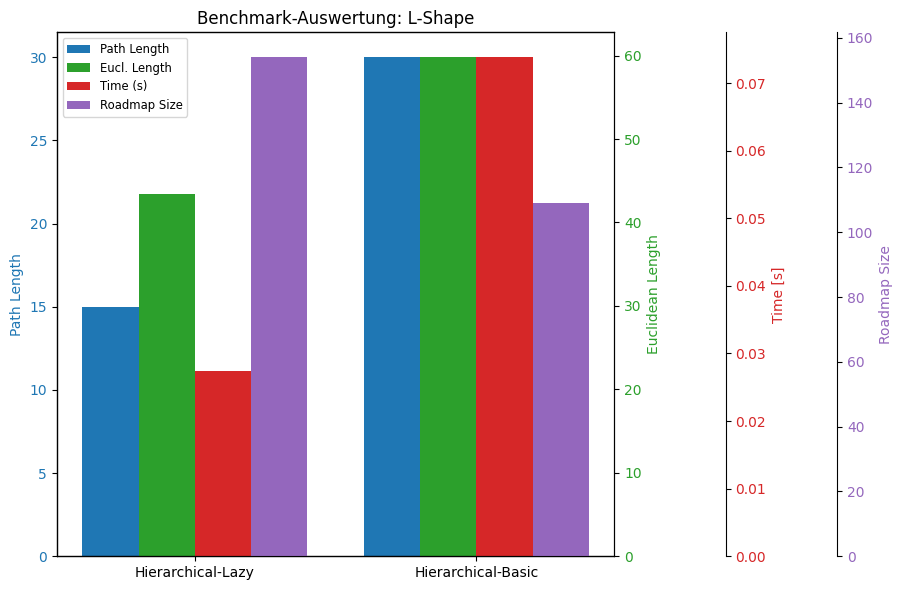

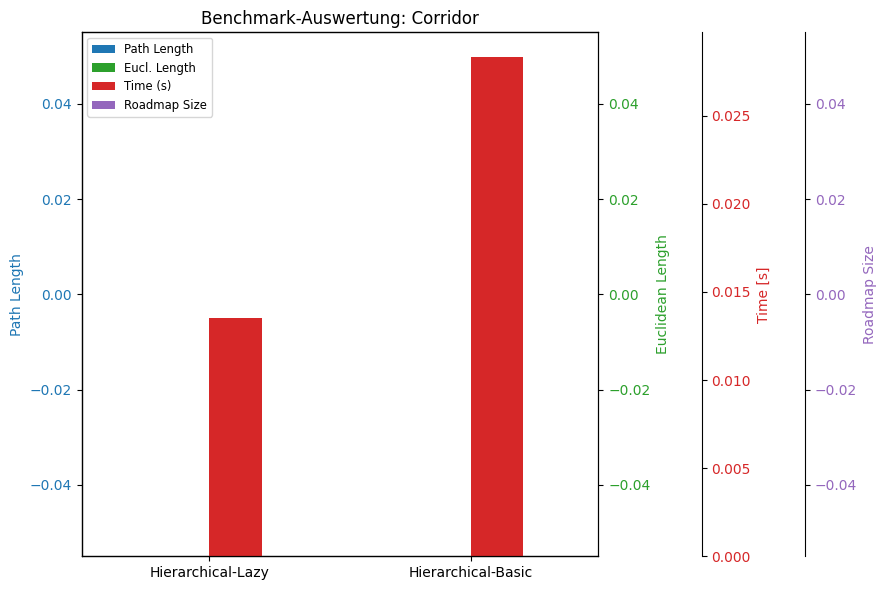

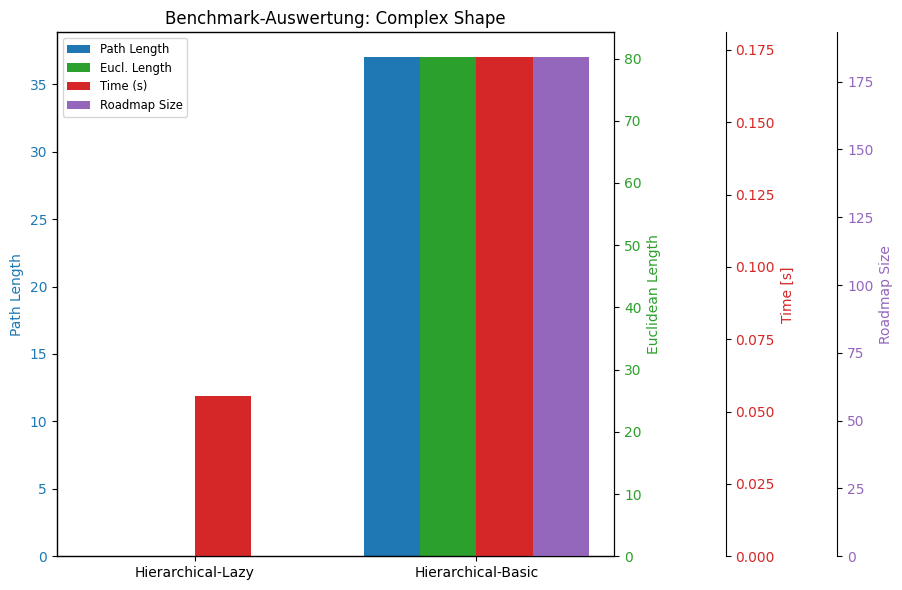

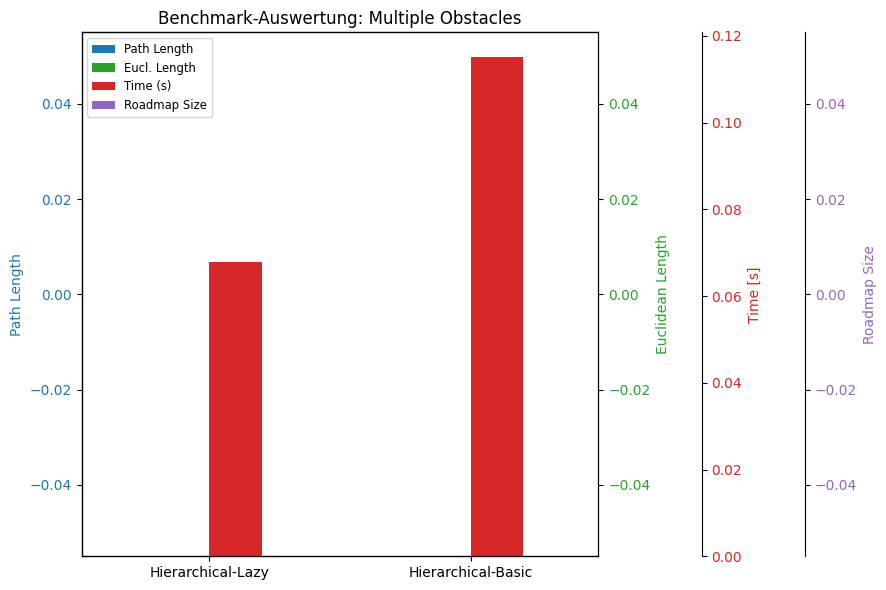

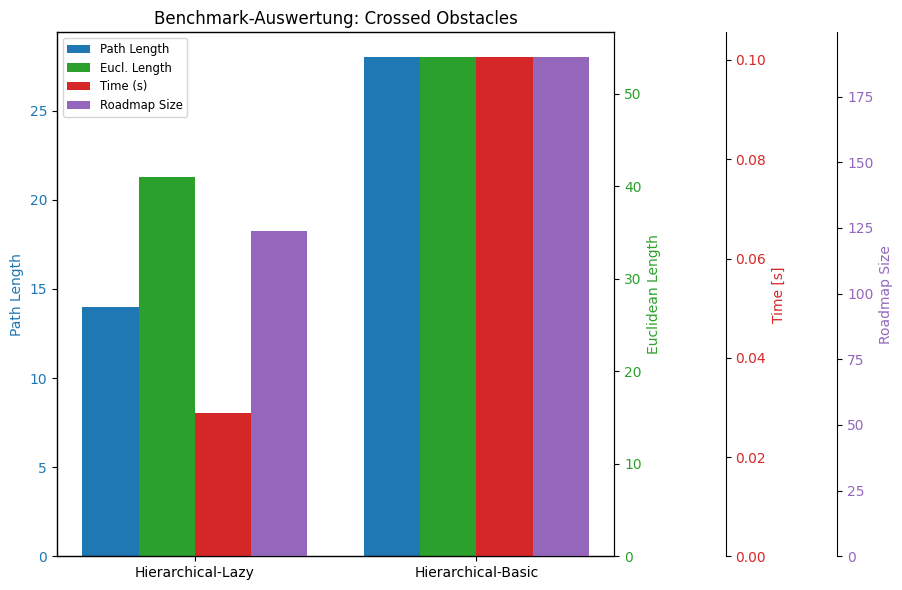

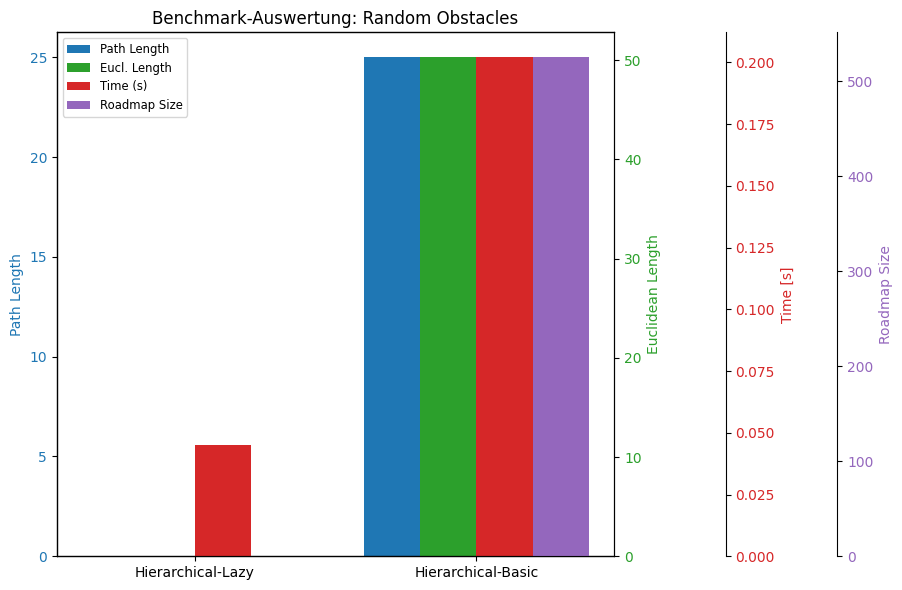

In [12]:
# Visualisierung
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

Globaler Pfad: ['start', 60, 0, 4, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([4.926591  , 2.11823541]), array([12.67326481,  1.36557681]), array([17.44943024, 19.57067286]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [4.926591   2.11823541]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [4.926591   2.11823541]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.0460111749103085)), (0, np.float64(5.641833382774767)))
Segment 1: [4.926591   2.11823541] → [12.67326481  1.36557681]
→ Lokaler Planner für Segment 1: [4.926591   2.11823541] → [12.67326481  1.36557681]
   Lokale Begrenzung (geclipped): ((np.float64(1.0167762175178918), np.float64(16.58307959372661)), (0, np.float64(9.52505780151225)))
Segment 2: [12.67326481  1.36557681] → [17.44943024 19.57067286]
→ Lokaler Planner für Segment 2: [12.67326481  1.36557681] → [17.44943024 19.57067286]
   Lokale Begrenzung (geclipped): ((np.float64(7.061347529428481), 22), (np.float64(2.4681248375122298), np.float64(18.468124837512228

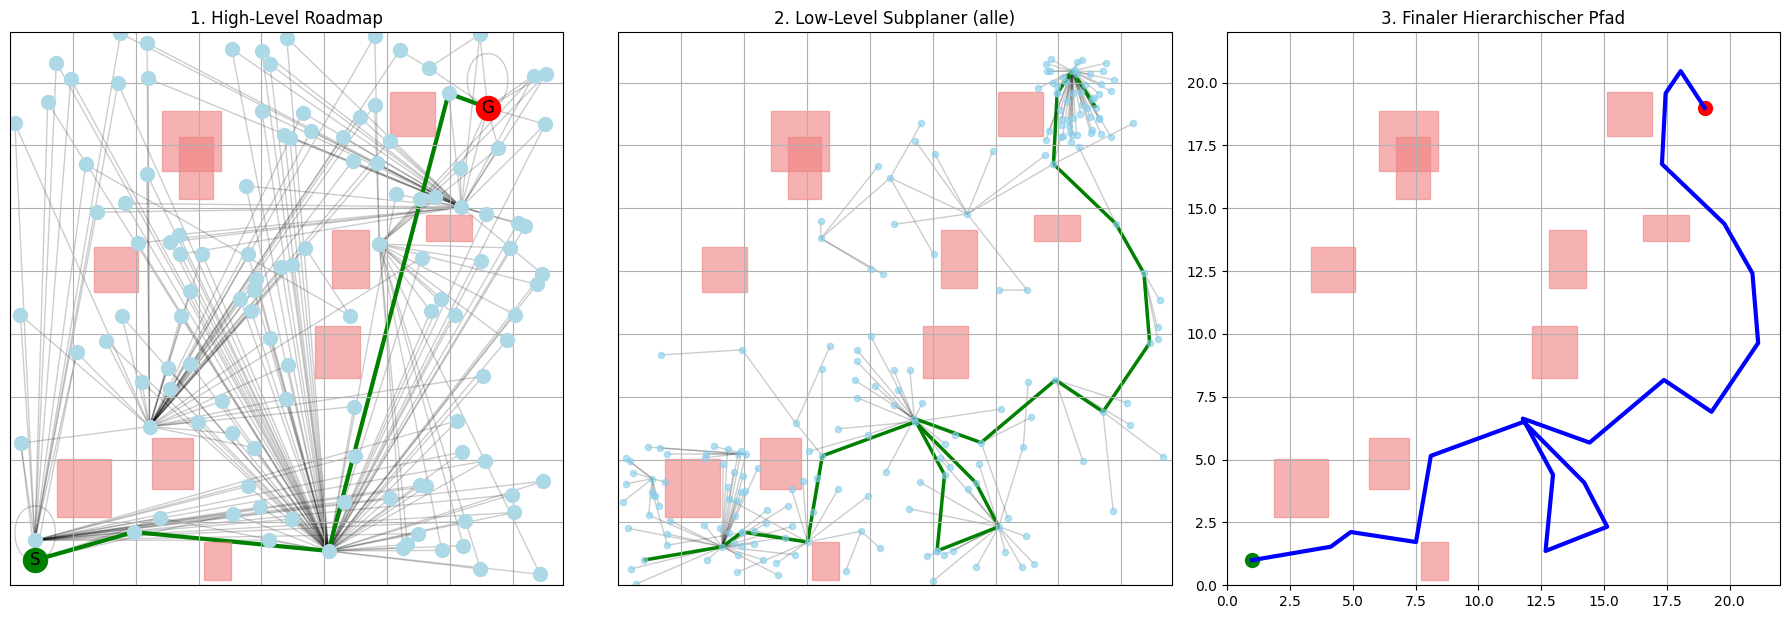

In [13]:
# --- Pfadplanung ---
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)


In [14]:
# --- Jede Szene durchlaufen ---
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen


🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 36, 5, 95, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([0.10511069, 7.19141113]), array([14.96967367,  5.69176635]), array([20.60102365,  2.44072942]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [0.10511069 7.19141113]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [0.10511069 7.19141113]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.052555342609816)), (np.float64(5.5957055653901655), np.float64(21.595705565390166)))


KeyError: 'initialRoadmapSize'